In [1]:
#Mobility Analytics - AV
#https://datahack.analyticsvidhya.com/contest/janatahack-mobility-analytics/#About


In [1]:
!pip install scikit-learn==0.21
!pip install fastai==0.7.0

In [2]:
!pip install automl

In [0]:
from fastai.imports import *
from fastai.structured import *

from sklearn.ensemble import RandomForestClassifier
from pandas_summary import DataFrameSummary

In [0]:
train = pd.read_csv("drive/My Drive/Mobility_JH/train_Wc8LBpr.csv")
test = pd.read_csv("drive/My Drive/Mobility_JH/test_VsU9xXK.csv")
submission = pd.read_csv("drive/My Drive/Mobility_JH/sample_submission_NoPBkjr.csv")

In [147]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [148]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [149]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [150]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [151]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [0]:
train_df = train.drop(["Trip_ID"],axis=1)
test_df = test.drop("Trip_ID",axis=1)

In [0]:
train_cats(train_df)
apply_cats(test_df,train_df)

In [154]:
train_df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [0]:
train_df['Type_of_Cab'] = train_df['Type_of_Cab'].cat.codes
train_df['Confidence_Life_Style_Index'] = train_df['Confidence_Life_Style_Index'].cat.codes
train_df['Destination_Type'] = train_df['Destination_Type'].cat.codes
train_df['Gender'] = train_df['Gender'].cat.codes
train_df.replace(-1,np.nan,inplace=True)

test_df['Type_of_Cab'] = test_df['Type_of_Cab'].cat.codes
test_df['Confidence_Life_Style_Index'] = test_df['Confidence_Life_Style_Index'].cat.codes
test_df['Destination_Type'] = test_df['Destination_Type'].cat.codes
test_df['Gender'] = test_df['Gender'].cat.codes
test_df.replace(-1,np.nan,inplace=True)

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
imputer = IterativeImputer(max_iter=100)
df_stg = train_df.copy()
imp_arr = imputer.fit_transform(df_stg)
imp_arr_test = imputer.fit_transform(test_df)
#return df_orig_slice, df_miss[cols], pd.DataFrame(imp_arr[:,[df_orig.columns.get_loc(i) for i in cols]], columns=cols), imputer.n_iter_

In [0]:
train_iterative = pd.DataFrame(imp_arr,columns=train_df.columns)
test_iterative = pd.DataFrame(imp_arr_test,columns=test_df.columns)

array([[ 6.77  ,  1.    ,  1.    , ..., 60.    ,  0.    ,  2.    ],
       [29.47  ,  1.    , 10.    , ..., 78.    ,  1.    ,  2.    ],
       [41.58  ,  1.5336, 10.    , ..., 77.    ,  1.    ,  2.    ],
       ...,
       [40.17  ,  2.    , 10.    , ..., 75.    ,  0.    ,  2.    ],
       [46.88  ,  1.    ,  4.    , ..., 79.    ,  1.    ,  2.    ],
       [31.96  ,  0.    ,  7.    , ..., 85.    ,  1.    ,  1.    ]])

In [0]:
for column in ['Type_of_Cab', 'Confidence_Life_Style_Index']:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)

In [0]:
train_iterative.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

In [0]:
train_it = pd.concat([train_iterative,train['Surge_Pricing_Type']],axis=1)

In [0]:
X_train,y_train,nas = proc_df(train_df,y_fld="Surge_Pricing_Type")
X_test,_,_ = proc_df(test_df)

In [137]:
X_train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Customer_Since_Months_na,Life_Style_Index_na,Var1_na
0,6.77,2,1.0,2.42769,1,1,3.90500,0,40.0,46,60,1,False,False,False
1,29.47,2,10.0,2.78245,2,1,3.45000,0,38.0,56,78,2,False,False,False
2,41.58,2,10.0,2.79805,2,5,3.50125,2,61.0,56,77,2,False,True,True
3,61.56,3,10.0,2.79805,2,1,3.45375,0,61.0,52,74,2,False,True,True
4,54.95,3,10.0,3.03453,2,1,3.40250,4,51.0,49,102,2,False,False,False


In [0]:
# Normalize
X_train['Trip_Distance'] = np.log(X_train['Trip_Distance'])
X_test['Trip_Distance'] = np.log(X_test['Trip_Distance'])
X_train['Var1'] = np.log(X_train['Var1'])
X_train['Var2'] = np.log(X_train['Var2'])
X_train['Var3'] = np.log(X_train['Var3'])

X_test['Var1'] = np.log(X_test['Var1'])
X_test['Var2'] = np.log(X_test['Var2'])
X_test['Var3'] = np.log(X_test['Var3'])

In [0]:
X_train = pd.get_dummies(X_train,columns=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type',
                                'Gender'])
X_test = pd.get_dummies(X_test,columns=['Type_of_Cab','Confidence_Life_Style_Index','Destination_Type',
                                'Gender'])

In [140]:
X_train.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Customer_Since_Months_na,Life_Style_Index_na,Var1_na,Type_of_Cab_1,Type_of_Cab_2,Type_of_Cab_3,Type_of_Cab_4,Type_of_Cab_5,Confidence_Life_Style_Index_1,Confidence_Life_Style_Index_2,Confidence_Life_Style_Index_3,Destination_Type_1,Destination_Type_2,Destination_Type_3,Destination_Type_4,Destination_Type_5,Destination_Type_6,Destination_Type_7,Destination_Type_8,Destination_Type_9,Destination_Type_10,Destination_Type_11,Destination_Type_12,Destination_Type_13,Destination_Type_14,Gender_1,Gender_2
0,1.912501,1.0,2.42769,3.90500,0,3.688879,3.828641,4.094345,False,False,False,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.383373,10.0,2.78245,3.45000,0,3.637586,4.025352,4.356709,False,False,False,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3.727619,10.0,2.79805,3.50125,2,4.110874,4.025352,4.343805,False,True,True,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,4.120012,10.0,2.79805,3.45375,0,4.110874,3.951244,4.304065,False,True,True,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.006424,10.0,3.03453,3.40250,4,3.931826,3.891820,4.624973,False,False,False,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [142]:
m = RandomForestClassifier(n_estimators=100,oob_score=True)
m.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = m.predict(X_test)

In [0]:
pd.DataFrame({"Trip_ID":test['Trip_ID'],"Surge_Pricing_Type":y_pred}).to_csv("Mobilitysubmission_rf_ohe.csv",index=False)

## Automl

In [156]:
train_df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [0]:
automl_train = pd.concat([X_train,pd.DataFrame(y_train,columns=["Surge_Pricing_Type"])],axis=1)

In [158]:
automl_train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Customer_Since_Months_na,Life_Style_Index_na,Var1_na,Surge_Pricing_Type
0,6.77,2,1.0,2.42769,1,1,3.90500,0,40.0,46,60,1,False,False,False,2
1,29.47,2,10.0,2.78245,2,1,3.45000,0,38.0,56,78,2,False,False,False,2
2,41.58,0,10.0,2.79805,0,5,3.50125,2,61.0,56,77,2,False,True,True,2
3,61.56,3,10.0,2.79805,0,1,3.45375,0,61.0,52,74,2,False,True,True,3
4,54.95,3,10.0,3.03453,2,1,3.40250,4,51.0,49,102,2,False,False,False,2


In [159]:
automl_train.describe()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,2.296342,6.015912,2.801448,1.699488,2.000144,2.849458,0.782838,62.474883,51.202800,75.099019,1.713190,2.155747
std,25.522882,1.508587,3.544411,0.207765,1.031167,1.906857,0.980675,1.037559,14.893324,4.986142,11.578278,0.452274,0.738164
min,0.310000,0.000000,0.000000,1.596380,0.000000,1.000000,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000,1.000000
25%,24.580000,1.000000,3.000000,2.687952,1.000000,1.000000,2.152500,0.000000,61.000000,48.000000,67.000000,1.000000,2.000000
50%,38.200000,2.000000,6.000000,2.798050,2.000000,1.000000,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000,2.000000
75%,60.730000,3.000000,10.000000,2.912815,3.000000,2.000000,3.582500,1.000000,61.000000,54.000000,82.000000,2.000000,3.000000
max,109.230000,5.000000,10.000000,4.875110,3.000000,14.000000,5.000000,8.000000,210.000000,124.000000,206.000000,2.000000,3.000000


In [160]:
automl_train['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [0]:
import seaborn as sns

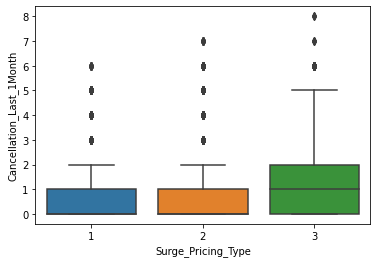

In [162]:
sns.boxplot(x="Surge_Pricing_Type",y="Cancellation_Last_1Month",data=automl_train)
plt.show()

In [0]:
automl_train['Customer_Rating'] = np.round(automl_train['Customer_Rating'])
X_test['Customer_Rating'] = np.round(X_test['Customer_Rating'])


# automl_train['Life_Style_Index'] = np.round(automl_train['Life_Style_Index'])
# X_test['Life_Style_Index'] = np.round(X_test['Life_Style_Index'])

In [164]:
automl_train.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Customer_Since_Months_na,Life_Style_Index_na,Var1_na,Surge_Pricing_Type
0,6.77,2,1.0,2.42769,1,1,4.0,0,40.0,46,60,1,False,False,False,2
1,29.47,2,10.0,2.78245,2,1,3.0,0,38.0,56,78,2,False,False,False,2
2,41.58,0,10.0,2.79805,0,5,4.0,2,61.0,56,77,2,False,True,True,2
3,61.56,3,10.0,2.79805,0,1,3.0,0,61.0,52,74,2,False,True,True,3
4,54.95,3,10.0,3.03453,2,1,3.0,4,51.0,49,102,2,False,False,False,2


In [0]:
from auto_ml import Predictor

In [166]:
column_descriptions = {
    'Type_of_Cab':'categorical',
    'Surge_Pricing_Type': 'output',
    'Confidence_Life_Style_Index':'categorical',
    'Destination_Type':'categorical',
    'Gender':'categorical',
    'Customer_Rating':'categorical'
}

ml_predictor = Predictor(type_of_estimator='classifier', column_descriptions=column_descriptions)
ml_predictor.train(automl_train,perform_feature_scaling=True,optimize_feature_learning=True)

ml_predictor.score(automl_train,automl_train['Surge_Pricing_Type'] )

Welcome to auto_ml! We're about to go through and make sense of your data using machine learning, and give you a production-ready pipeline to get predictions with.

If you have any issues, or new feature ideas, let us know at http://auto.ml
You are running on version 2.9.9
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}
Running basic data cleaning
Performing feature scaling
Fitting DataFrameVectorizer
Now using the model training_params that you passed in:
{}
After overwriting our defaults with your values, here are the final params that will be used to initialize the model:
{'presort': False, 'learning_rate': 0.1, 'warm_start': True}


********************************************************************************************
About to fit the pipeline for the model GradientBoostingClassifier to pr

0.7087618295331987

In [75]:
X_test.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Customer_Since_Months_na,Life_Style_Index_na,Var1_na
0,9.44,1,10.0,3.0,1,2,4.0,2,61.0,46,63,2,False,False,True
1,32.15,2,10.0,3.0,1,1,2.0,0,65.0,49,80,1,False,False,False
2,10.38,3,4.0,3.0,1,4,5.0,0,61.0,47,74,2,False,False,True
3,14.94,2,6.0,2.0,3,5,5.0,0,63.0,43,54,2,False,False,False
4,32.03,2,7.0,3.0,1,11,5.0,3,96.0,44,56,2,False,False,False


In [0]:
y_prediction = ml_predictor.predict(X_test)

In [0]:
pd.DataFrame({"Trip_ID":test['Trip_ID'],"Surge_Pricing_Type":y_prediction}).to_csv("Mobilitysubmission_automl_final.csv",index=False)

In [0]:
!pip install scikit-learn==0.22

  Using cached https://files.pythonhosted.org/packages/2e/d0/860c4f6a7027e00acff373d9f5327f4ae3ed5872234b3cbdd7bcb52e5eff/scikit_learn-0.22-cp36-cp36m-manylinux1_x86_64.whl
ERROR: pycaret 1.0.0 has requirement lightgbm==2.3.1, but you'll have lightgbm 2.0.12 which is incompatible.
  Found existing installation: scikit-learn 0.21.0
    Uninstalling scikit-learn-0.21.0:
      Successfully uninstalled scikit-learn-0.21.0


In [0]:
X_test.to_csv("X_test.csv",index=False)
automl_train.to_csv("automl.csv",index=False)
test.to_csv('mytest.csv',index=False)

## Auto Viz

In [0]:
!pip install autoviz

In [0]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (131662, 16)
Classifying variables in data set...
    15 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Total Number of Scatter Plots = 10
Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 6.475


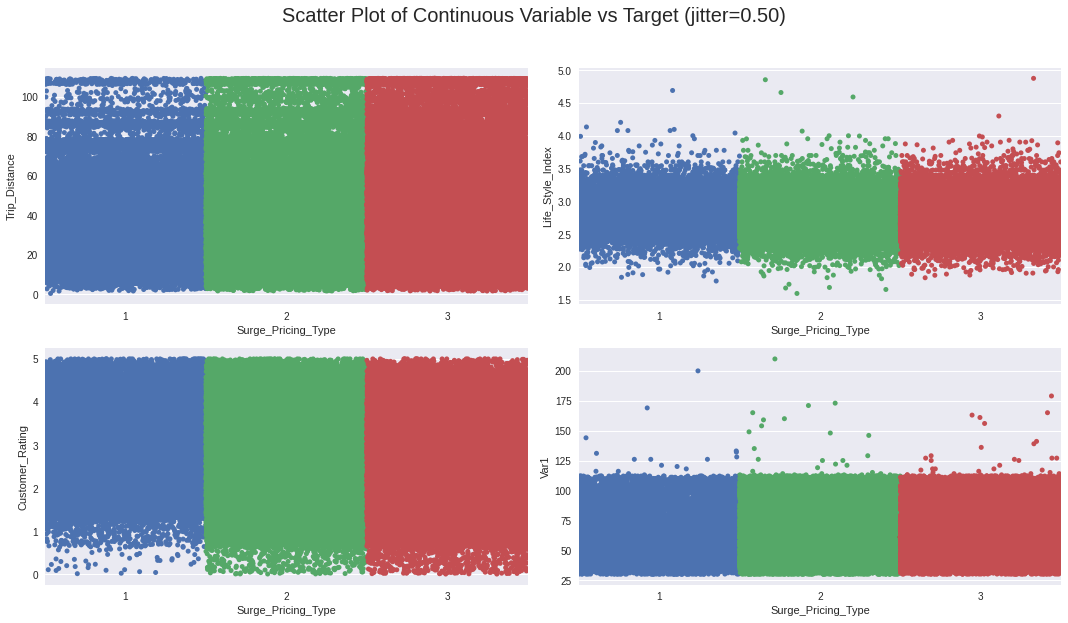

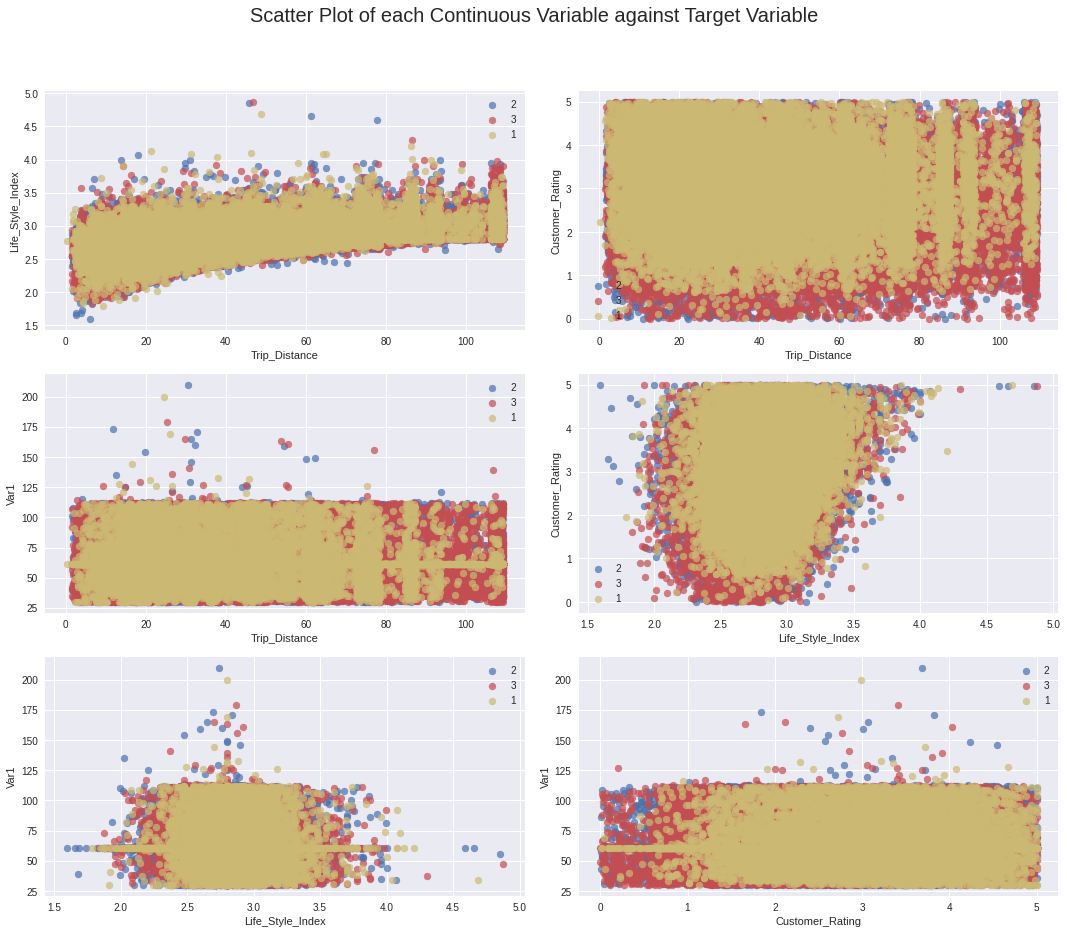

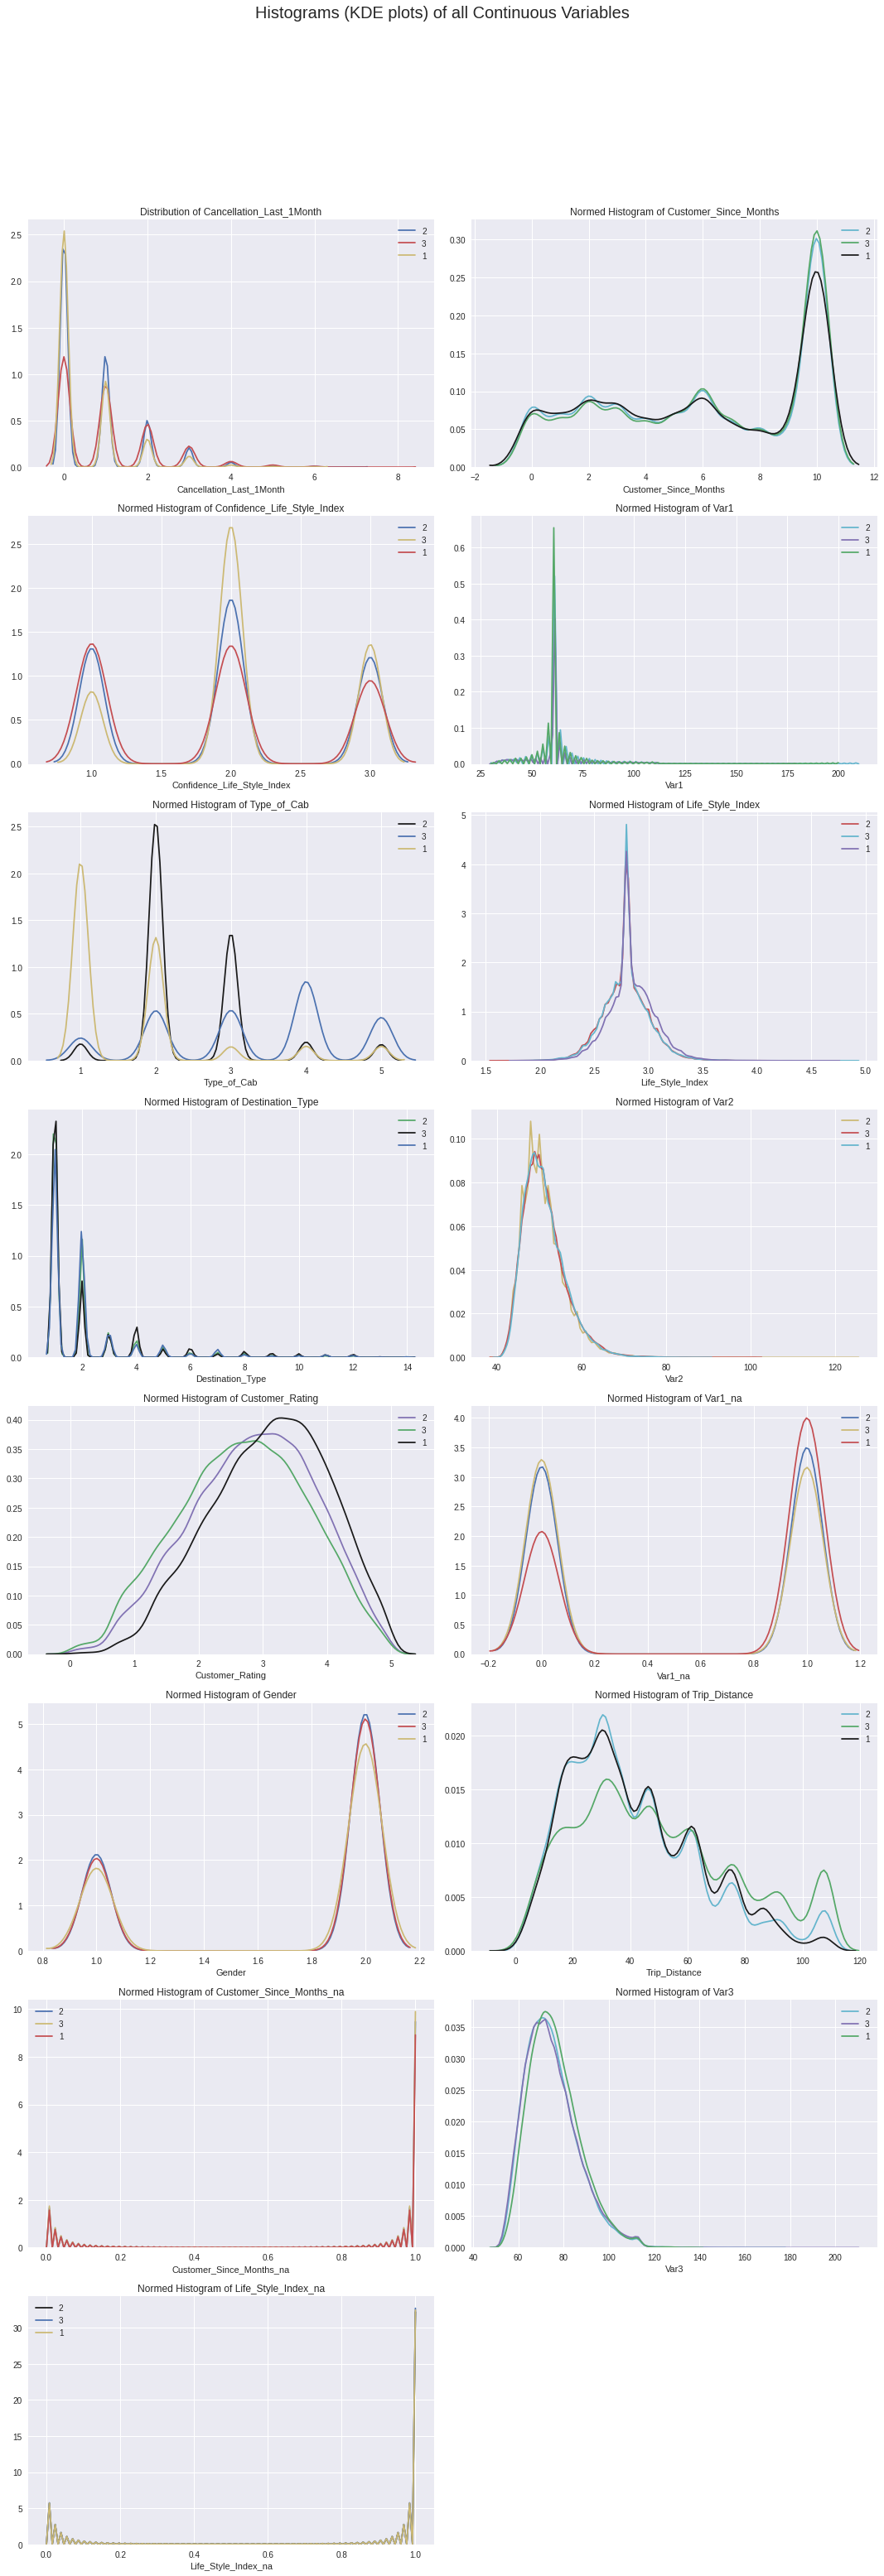

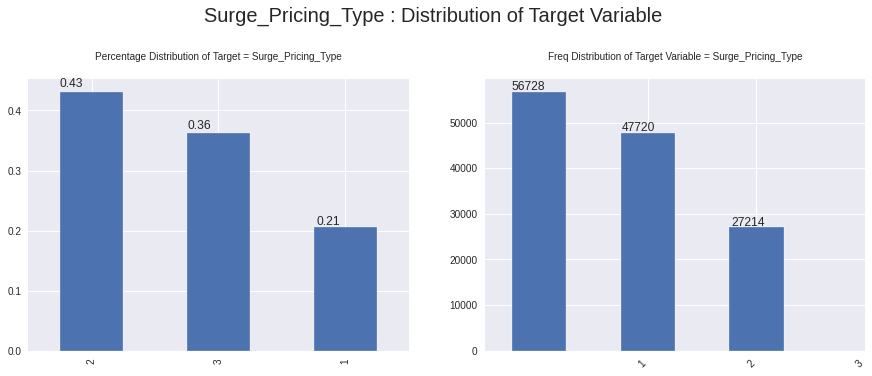

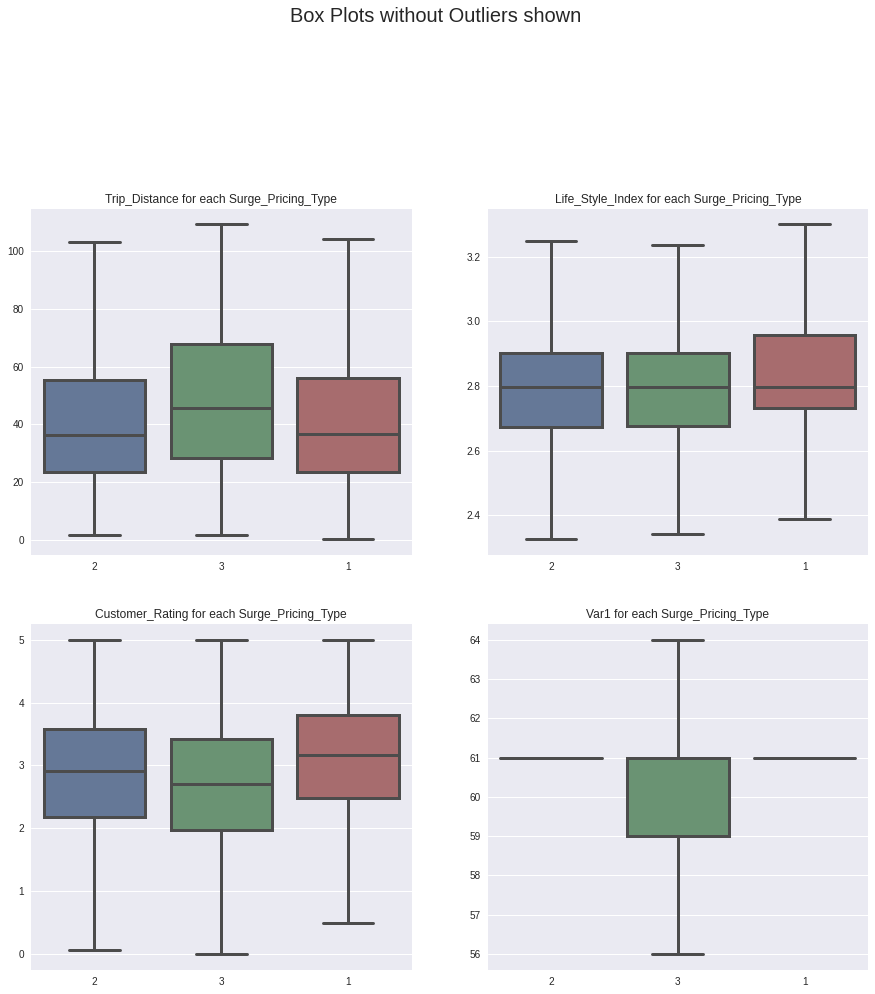

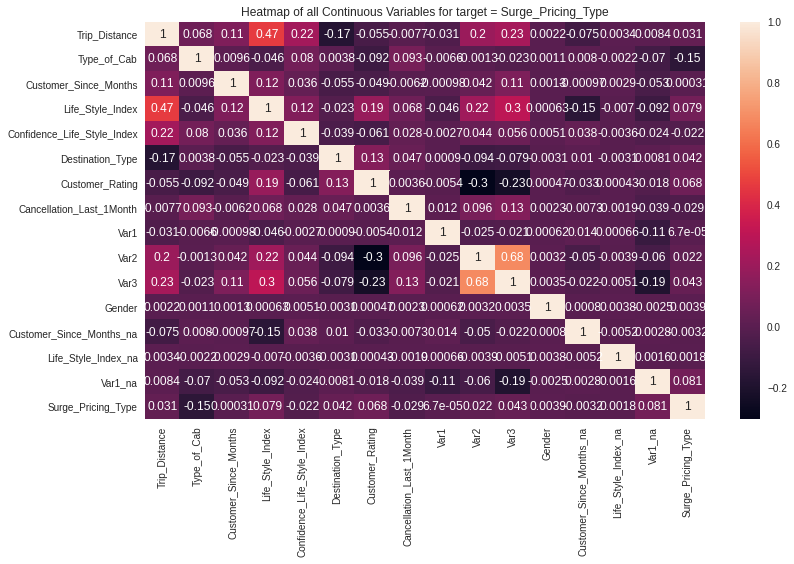

In [0]:
dft = AV.AutoViz(
    "",
    "",
    "Surge_Pricing_Type",
    automl)